In [179]:
import tensorflow as tf
from tensorflow import keras

In [180]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [181]:
# Load the data
from keras.utils import np_utils

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # From Tf "Hello World" recommendation

x_train = x_train
x_test = x_test

y_train = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype = "float32")
y_test = tf.keras.utils.to_categorical(y_test, num_classes=None, dtype = "float32")

#### Building models for recognizing digits:
As a start implement a linear model  h = Wx - $ \theta\ $ . Initialize W £ R^ 10,784 and $ \theta\ $ £ R ^10  with zeros



In [182]:

model_linear = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(
        1,
        activation = 'linear',
        use_bias = True,
        kernel_initializer='zeros', 
        bias_initializer='zeros'
    ),
    tf.keras.layers.Dense(
        10, 
        activation='softmax', 
        use_bias = False, 
        kernel_initializer='zeros', 
        bias_initializer='zeros'
    )    
])  

model_linear.compile(
    #optimizer=keras.optimizers.SGD(learning_rate=0.5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model_linear.summary()

#Train model
history = model_linear.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=600, 
    validation_data = (x_test,y_test),
    verbose=False
)

2022-12-09 21:38:30.905026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-09 21:38:32.042318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


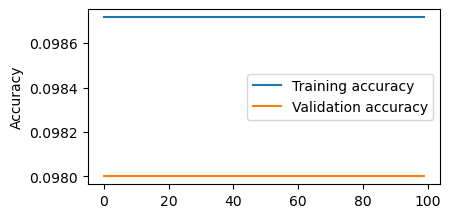

In [183]:
# Plot the results of the model 

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(221)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


2. Implement a second model: A fully connected MLP with 3 hidden layers with 1500 hidden neurons in each hidden layer

In [184]:
from keras.utils import np_utils

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # From Tf "Hello World" recommendation

x_train = x_train
x_test = x_test

y_train = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype = "float32")
y_test = tf.keras.utils.to_categorical(y_test, num_classes=None, dtype = "float32")

In [185]:

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  tf.keras.layers.Dense(
    1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dense(1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dense(1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dense(10, 
    activation = 'softmax',
    kernel_initializer = 'zeros', 
    bias_initializer= 'zeros'
  )
])

model.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08), 
    metrics = ['accuracy']
)

#model.summary()

In [186]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=100, 
    validation_data = (x_test,y_test),
    steps_per_epoch=100,
    verbose=True
)


Epoch 1/10
  4/100 [>.............................] - ETA: 1s - loss: 2.8463 - accuracy: 0.2475 

2022-12-09 21:40:00.246118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 98/100 [============================>.] - ETA: 0s - loss: 0.6122 - accuracy: 0.8172

2022-12-09 21:40:02.023426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 3s 24ms/step - loss: 0.6057 - accuracy: 0.8192 - val_loss: 0.2439 - val_accuracy: 0.9239
Epoch 2/10
100/100 [==============================] - 2s 23ms/step - loss: 0.2547 - accuracy: 0.9255 - val_loss: 0.2180 - val_accuracy: 0.9392
Epoch 3/10
100/100 [==============================] - 2s 23ms/step - loss: 0.2153 - accuracy: 0.9412 - val_loss: 0.1616 - val_accuracy: 0.9537
Epoch 4/10
100/100 [==============================] - 2s 23ms/step - loss: 0.1813 - accuracy: 0.9502 - val_loss: 0.1713 - val_accuracy: 0.9532
Epoch 5/10
100/100 [==============================] - 2s 23ms/step - loss: 0.1803 - accuracy: 0.9495 - val_loss: 0.1707 - val_accuracy: 0.9518
Epoch 6/10
100/100 [==============================] - 2s 23ms/step - loss: 0.1598 - accuracy: 0.9554 - val_loss: 0.1665 - val_accuracy: 0.9570
Epoch 7/10
100/100 [==============================] - 2s 23ms/step - loss: 0.1283 - accuracy: 0.9655 - val_loss: 0.1206 - val_accuracy: 0.9647
Epoch 8/10

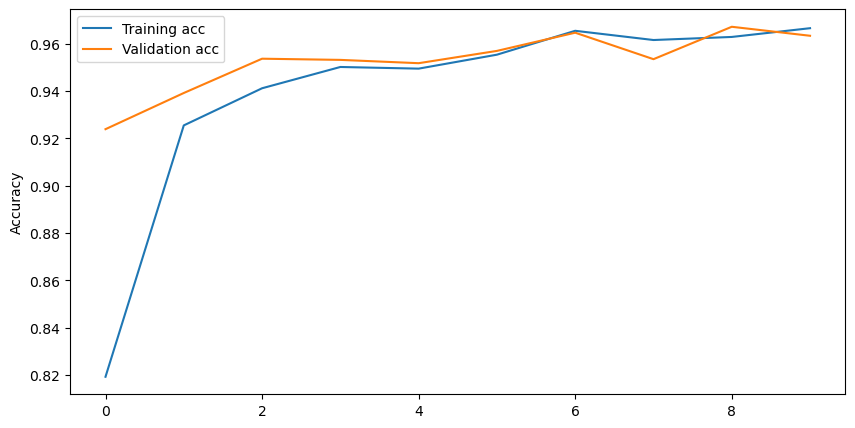

In [187]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.plot(history.history['accuracy'], label='Training acc')
ax1.plot(history.history['val_accuracy'], label='Validation acc')
plt.ylabel('Accuracy')
plt.legend()


3. For the third model, take the above MLP while adding dropout regularization during training. Apply a dropout rate of 0.5 to each of the hidden layers. Watch out for what happens with dropout when you’re making predictions on the hold-out set.

In [188]:
model_dropout = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  tf.keras.layers.Dense(
    1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, 
    activation = 'softmax',
    kernel_initializer = 'zeros', 
    bias_initializer= 'zeros'
  )
])

model_dropout.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08), 
    metrics = ['accuracy']
)

#model.summary()

In [189]:
history_dropout = model_dropout.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=100, 
    validation_data = (x_test,y_test),
    steps_per_epoch=100,
    verbose=False
)

2022-12-09 21:40:23.689540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-09 21:40:25.477649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


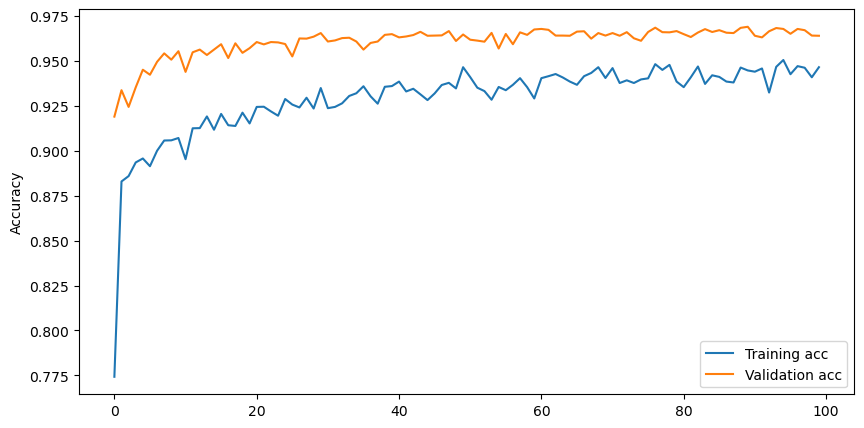

In [190]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.plot(history_dropout.history['accuracy'], label='Training acc')
ax1.plot(history_dropout.history['val_accuracy'], label='Validation acc')
plt.ylabel('Accuracy')
plt.legend()